## **Cosine Similarity Explained**

### **1. Definition and Formula**
**Cosine similarity** measures the similarity between two non-zero vectors by calculating the cosine of the angle between them. It focuses on **direction** rather than magnitude, making it ideal for comparing high-dimensional data (e.g., embeddings).

**Formula**:  
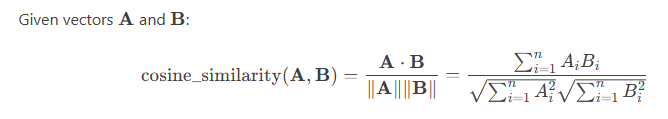

- **Range**: `[-1, 1]`  
  - **1**: Vectors are identical (angle = 0°).  
  - **0**: Vectors are orthogonal (no similarity).  
  - **-1**: Vectors are diametrically opposed.

---

## **2. Role in Vector Database Similarity Search**
Vector databases (e.g., Pinecone, Milvus, Weaviate) store data as **dense vectors** (embeddings). Similarity search finds vectors "closest" to a query vector. Here's how cosine similarity fits in:

### **A. Normalization for Efficiency**
- Vectors are often **normalized to unit length** (magnitude = 1).  
- Formula simplifies to **dot product**:  
  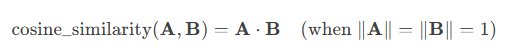
- Dot products are computationally efficient for large-scale searches.

### **B. Angle-Based Similarity**
- Measures **semantic similarity** in embeddings (e.g., NLP, image retrieval).  
  - *Example*:  
    `"king"` and `"queen"` have similar directions → high cosine similarity.  
    `"apple"` (fruit) and `"Tesla"` (car) are unrelated → low similarity.  
- Ignores vector magnitude, focusing on relative feature weights.

### **C. Use in Indexing and Querying**
- Vector databases use **Approximate Nearest Neighbor (ANN)** indexes (e.g., HNSW, IVF), see more https://www.pinecone.io/learn/series/faiss/hnsw/
- These indexes optimize for fast cosine-similarity searches:  
  1. **Pre-normalize** vectors during ingestion.  
  2. **Rank results** by descending cosine similarity (or dot product).

### **D. How It Used in Vector Databases**
- **Preprocessing**: Often, vectors are normalized to unit length (Euclidean norm of 1) upon insertion into the database. This way, the cosine similarity between two vectors is just their dot product.
- **Indexing**: Vector databases use specialized indexes (like HNSW, IVF, etc.) to perform approximate nearest neighbor (ANN) search efficiently in high-dimensional spaces. These indexes can be optimized for cosine similarity by leveraging the properties of normalized vectors.
- **Querying**: Given a query vector, the database returns the vectors (or their identifiers) that have the highest cosine similarity (or equivalently the highest dot product for normalized vectors) to the query vector.

---

## **3. Practical Example with Code**
### **Python Implementation**


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Define 5-dimensional vectors for each word (hypothetical embeddings)
vectors = {  # Hypothetical embeddings, not real one
    "cat":    [0.9, 0.2, 0.1, 0.4, 0.5],
    "dog":    [0.8, 0.3, 0.1, 0.3, 0.6],
    "bird":   [0.2, 0.8, 0.6, 0.1, 0.1],
    "frog":   [0.3, 0.6, 0.5, 0.2, 0.2],
    "apple":  [0.1, 0.1, 0.1, 0.9, 0.1]
}

# Queries (hypothetical embeddings for "puppy" and "kitten")
queries = {
    "puppy": [0.85, 0.25, 0.1, 0.32, 0.58],  # Similar to "dog"
    "kitten": [0.88, 0.15, 0.1, 0.45, 0.5]   # Similar to "cat"
}

# Convert to numpy arrays for calculations
vector_names = list(vectors.keys())
vector_values = np.array(list(vectors.values()))
query_values = np.array(list(queries.values()))

# Calculate cosine similarity between queries and all vectors
similarities = cosine_similarity(query_values, vector_values)

# Print results
for i, query in enumerate(queries.keys()):
    print(f"\nQuery: '{query}'")
    print("-" * 30)
    for j, name in enumerate(vector_names):
        print(f"{name}: {similarities[i][j]:.3f}")

    # Find the most similar vector
    best_match_idx = np.argmax(similarities[i])
    print(f"\nMost similar to '{query}': '{vector_names[best_match_idx]}' (similarity={similarities[i][best_match_idx]:.3f})")

**Key Points**
1. Embedding Vectors:
   * Hypothetical 5D vectors represent semantic meaning (e.g., "dog" and "puppy" are close).
   * Real-world applications use models like Word2Vec, GloVe, or Transformer embeddings (e.g., BERT).

2. Cosine Similarity:
   * Normalizes vectors and computes the cosine of the angle between them.
   * Output range: [-1, 1] (1 = identical direction).

3. Query Results:
   * "puppy" is most similar to "dog" (expected).
   * "kitten" is most similar to "cat" (expected).

4. Extensions:
   * Use pre-trained embeddings (e.g., from gensim or sentence-transformers).
   * Scale to large datasets with vector databases (Pinecone, Milvus).

### Real-World Adaptation
Replace the hypothetical vectors with real embeddings (e.g., from SentenceTransformer):

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from sentence_transformers import SentenceTransformer

print("\n--- Using a Sentence Transformer model for direct embeddings ---")

# Load a Sentence Transformer model
# 'all-MiniLM-L6-v2' is a popular and efficient choice for sentence embeddings.
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
query_word_st = "puppy"
query_embedding_st = sentence_model.encode(query_word_st)
print(f"Sentence-BERT embedding for '{query_word_st}': Shape {query_embedding_st.shape}\n")

target_words_st = ["cat", "dog", "bird", "frog", "apple"]
vectors_st = {}
for word in target_words_st:
    embedding_st = sentence_model.encode(word)
    vectors_st[word] = embedding_st
    print(f"Sentence-BERT embedding for '{word}': Shape {embedding_st.shape}")

print("\nAll target word embeddings obtained (Sentence-BERT):")
for word, vec in vectors_st.items():
    print(f"  {word}: (Shape: {vec.shape})")

In [ ]:
# Calculate cosine similarity between the query embedding and all target vectors
similarities_st = {}
for word, embedding in vectors_st.items():
    similarity = cosine_similarity([query_embedding_st], [embedding])[0][0]
    similarities_st[word] = similarity

# Find the word with the highest similarity to the query word
most_similar_word_st = max(similarities_st, key=similarities_st.get)
highest_similarity_st = similarities_st[most_similar_word_st]

print(f"The word most similar to '{query_word_st}' is '{most_similar_word_st}' with a similarity of {highest_similarity_st:.3f}")

### Similar test for Sentence Embedding

In [ ]:
# First, ensure you have the library installed:
# pip install sentence-transformers numpy

from sentence_transformers import SentenceTransformer
import numpy as np

# 1. Load the pre-trained Sentence Transformer model
# This model is specifically designed to produce good sentence embeddings for similarity.
sentence_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


In [ ]:
# 2. Define a function to get sentence embedding using the SentenceTransformer model
def get_sentence_embedding(text, model):
    # The .encode() method directly produces the sentence embedding
    # It handles tokenization and pooling internally.
    return model.encode(text)

# 3. Get the embedding for a query sentence
query_sentence = "The quick brown fox jumps over the lazy dog."
query_embedding = get_sentence_embedding(query_sentence, sentence_model)

print(f"Sentence-Transformers embedding for '{query_sentence}': Shape {query_embedding.shape}")
# print(query_embedding[:5]) # Print first 5 dimensions for a peek

# 4. Get embeddings for a list of target sentences/phrases
target_sentences = [
    "A fast brown fox leaps over the sleepy canine.",
    "Cats are known for their agility.",
    "This is a sentence about an apple.",
    "The dog slept soundly on the rug.",
    "หมาจิ้งจอกกระโดดข้ามสุนัขที่นอนหลับอยู่"
]
vectors = {}

# For efficiency, you can encode a list of sentences in one go (batching)
# This is automatically handled by the .encode() method when passed a list.
target_embeddings_batch = sentence_model.encode(target_sentences)

for i, sentence in enumerate(target_sentences):
    # Retrieve the embedding for the current sentence from the batch results
    embedding = target_embeddings_batch[i]
    vectors[sentence] = embedding
    print(f"Sentence-Transformers embedding for '{sentence}': Shape {embedding.shape}")

print("\nAll target sentence embeddings obtained (sentence-transformers/all-MiniLM-L6-v2):")
for sentence, vec in vectors.items():
    print(f"  '{sentence}': (Shape: {vec.shape})")

# Example of calculating cosine similarity (common use case for these embeddings)
from sklearn.metrics.pairwise import cosine_similarity

print("\n--- Cosine Similarity Examples ---")
# Reshape for sklearn's cosine_similarity if only one vector
query_embedding_reshaped = query_embedding.reshape(1, -1)

for sentence, embedding in vectors.items():
    embedding_reshaped = embedding.reshape(1, -1)
    similarity = cosine_similarity(query_embedding_reshaped, embedding_reshaped)[0][0]
    print(f"Similarity between '{query_sentence}' and '{sentence}': {similarity:.4f}")